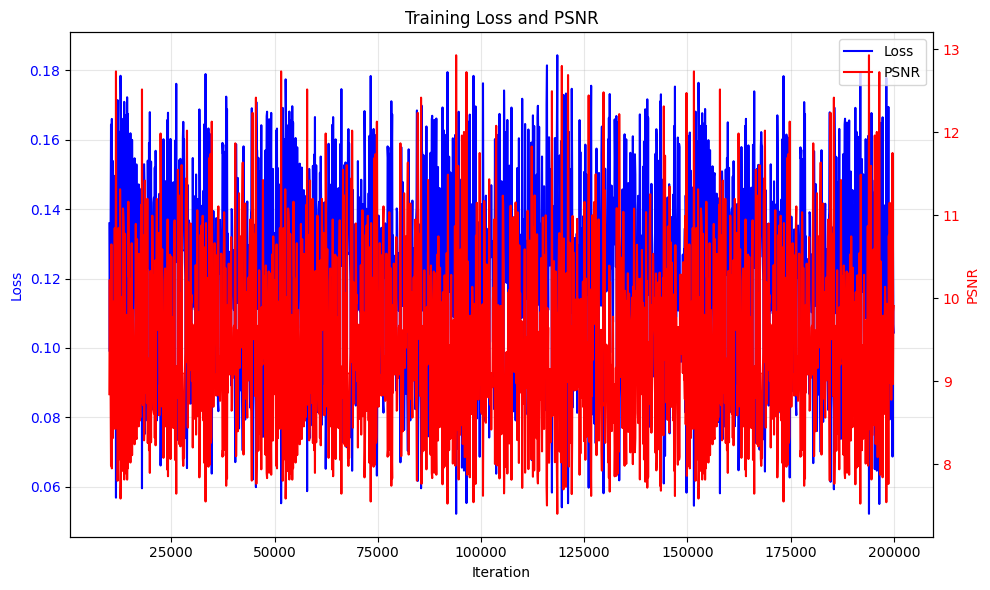

In [3]:
import matplotlib.pyplot as plt
import re

# 读取数据
iterations = []
losses = []
psnrs = []

with open('train.txt', 'r') as f:
    for line in f:
        # 使用正则表达式提取数据
        match = re.search(r'Iter: (\d+) Loss: ([\d.]+)  PSNR: ([\d.]+)', line)
        if match:
            iterations.append(int(match.group(1)))
            losses.append(float(match.group(2)))
            psnrs.append(float(match.group(3)))

# 创建图形
plt.figure(figsize=(10, 6))

# 创建双y轴
ax1 = plt.gca()
ax2 = ax1.twinx()

# 绘制loss曲线（左y轴）
line1 = ax1.plot(iterations, losses, 'b-', label='Loss')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 绘制PSNR曲线（右y轴）
line2 = ax2.plot(iterations, psnrs, 'r-', label='PSNR')
ax2.set_ylabel('PSNR', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加图例
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

# 添加网格
ax1.grid(True, alpha=0.3)

# 设置标题
plt.title('Training Loss and PSNR')

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('training_curves.png')
plt.show()